<img src="https://admissions.ntust.edu.tw/front_index/images/logo.png" alt="drawing" width="600"/>
<h1><center>MACHINE LEARNING : HOMEWORK 2</center></h1>
<h1><center>Data 2 : Authors prediction</center></h1>
<h2>Hector LANDES - M10601810</h2>
<h2>Machine Learning - CS5087701</h2>

In [60]:
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from nltk import word_tokenize, pos_tag, pos_tag_sents
import scipy.interpolate as interp
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from sacremoses import MosesTokenizer, MosesDetokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from collections import Counter
from nltk.corpus import wordnet
import tensorflow as tf
import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from ann_visualizer.visualize import ann_viz;
import graphviz
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Hector Landes\graphviz-2.38\release\bin'

Using TensorFlow backend.


In [109]:
test = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\test.csv')
train = pd.read_csv (r'C:\Users\Hector Landes\Desktop\Data Science Projects\20191005 Homework_1_ML\2. Prepared Data\train.csv')

Create boolean value if author is EAP, HPL or MWS

In [173]:
a2c = {'EAP': 0, 'HPL' : 1, 'MWS' : 2}
y = np.array([a2c[a] for a in train.author])
y = to_categorical(y)
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

<ul>
<h3>Preprocessing from the HM1</3>
</ul>

In [131]:
eng_stopwords = set(stopwords.words("english"))
train["num_stopwords"] = train["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
test["num_stopwords"] = test["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

In [132]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()

In [133]:
def Tokenize(text):
    tokens = tokenizer.tokenize(text.lower())
    return tokens

def RemoveStopwords(word_list):
    return [word for word in word_list if word not in stopwords.words('english')]

def GetWordnetPos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def LemmatizeTokens(word_list):
    return [lemmatizer.lemmatize(word, GetWordnetPos(word)) for word in word_list]
   
def CountPartOfSpeech(word_list):
    tagged = nltk.pos_tag(nltk.Text(word_list))
    counts = Counter(tag for word, tag in tagged)
    total = sum(counts.values())
    ret = dict((word, float(count) / total) for word, count in counts.items())
    return ret

def ExtractPartOfSpeech(pos_dict, pos_to_extract):
    if pos_to_extract in pos_dict.keys():


        return pos_dict[pos_to_extract]
   
    return 0

In [134]:
kiki = train.iloc[0:4000]

In [135]:
kiki["tokens"] = kiki.text.apply(lambda x: LemmatizeTokens(RemoveStopwords(Tokenize(x))))

#train["tokens"] = train.text.apply(lambda x: LemmatizeTokens(RemoveStopwords(Tokenize(x))))
#test["tokens"] = test.text.apply(lambda x: LemmatizeTokens(RemoveStopwords(Tokenize(x))))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
kiki["pos"] = kiki.tokens.apply(CountPartOfSpeech)

#train["pos"] = train.tokens.apply(CountPartOfSpeech)
#test["pos"] = test.tokens.apply(CountPartOfSpeech)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
kiki["prop_noun"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "NN"))
kiki["prop_verb"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "VB"))
kiki["prop_adj"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "JJ"))
kiki["prop_adv"] = kiki.pos.apply(lambda x: ExtractPartOfSpeech(x, "RB"))

#train["prop_noun"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "NN"))
#train["prop_verb"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "VB"))
#train["prop_adj"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "JJ"))
#train["prop_adv"] = train.pos.apply(lambda x: ExtractPartOfSpeech(x, "RB"))
#test["prop_noun"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "NN"))
#test["prop_verb"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "VB"))
#test["prop_adj"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "JJ"))
#test["prop_adv"] = test.pos.apply(lambda x: ExtractPartOfSpeech(x, "RB"))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [138]:
kiki["num_words"] = kiki["text"].apply(lambda x: len(str(x).split()))

#train["num_words"] = train["text"].apply(lambda x: len(str(x).split()))
#test["num_words"] = test["text"].apply(lambda x: len(str(x).split()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
kiki["token_num_words"] = kiki["tokens"].apply(lambda x: len(str(x).split()))
#test["token_num_words"] = test["tokens"].apply(lambda x: len(str(x).split()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
kiki["num_unique_words"] = kiki["text"].apply(lambda x: len(set(str(x).split())))
#test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
kiki["num_chars"] = kiki["text"].apply(lambda x: len(str(x)))
#test["num_chars"] = test["text"].apply(lambda x: len(str(x)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
kiki["num_punctuations"] = kiki['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )
#test["num_punctuations"] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
kiki["num_words_upper"] = kiki["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#test["num_words_upper"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
kiki["num_words_title"] = kiki["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#test["num_words_title"] = test["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
kiki["mean_word_len"] = kiki["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#test["mean_word_len"] = test["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
kiki["mean_word_len"] = kiki["tokens"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#test["mean_word_len"] = test["tokens"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
kiki["std_word_len"] = kiki["text"].apply(lambda x: np.std([len(w) for w in str(x).split()]))
#test["std_word_len"] = test["text"].apply(lambda x: np.std([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
kiki["std_word_len"] = kiki["tokens"].apply(lambda x: np.std([len(w) for w in str(x).split()]))
#test["std_word_len"] = test["tokens"].apply(lambda x: np.std([len(w) for w in str(x).split()]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
kiki['label_author'] = LabelEncoder().fit_transform(kiki['author'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
cols = kiki.columns.tolist()
cols

['id',
 'text',
 'author',
 'num_stopwords',
 'tokens',
 'pos',
 'prop_noun',
 'prop_verb',
 'prop_adj',
 'prop_adv',
 'num_words',
 'token_num_words',
 'num_unique_words',
 'num_chars',
 'num_punctuations',
 'num_words_upper',
 'num_words_title',
 'mean_word_len',
 'std_word_len',
 'label_author']

In [151]:
kiki = kiki[['id',
 'text',
 'author',
 'tokens',
 'pos',
'num_stopwords',             
 'prop_noun',
 'prop_verb',
 'prop_adj',
 'prop_adv',
 'num_words',
 'token_num_words',
 'num_unique_words',
 'num_chars',
 'num_punctuations',
 'num_words_upper',
 'num_words_title',
 'mean_word_len',
 'std_word_len',
 'label_author']]
#test = test[['id',
# 'text',
# 'tokens',
# 'pos',
#'num_stopwords',             
# 'prop_noun',
# 'prop_verb',
# 'prop_adj',
# 'prop_adv',
# 'num_words',
# 'token_num_words',
# 'num_unique_words',
# 'num_chars',
# 'num_punctuations',
# 'num_words_upper',
# 'num_words_title',
# 'mean_word_len',
# 'std_word_len']]

<ul>
<b> X </b> as the <b> Feature Matrix and normalization </b> 
</ul>

In [152]:
X = kiki[kiki.columns[5:19]]
X = (X - X.min()) / (X.max() - X.min())
X[0:2]

,num_stopwords,prop_noun,prop_verb,prop_adj,prop_adv,num_words,token_num_words,num_unique_words,num_chars,num_punctuations,num_words_upper,num_words_title,mean_word_len,std_word_len
0,0.119497,0.52381,0.047619,0.142857,0.095238,0.101604,0.093458,0.146789,0.096374,0.103448,0.181818,0.107143,0.500000,0.327177
1,0.050314,0.00000,0.333333,0.166667,0.166667,0.029412,0.023364,0.050459,0.022946,0.000000,0.000000,0.035714,0.464286,0.174078


<ul>
    <li> <b> Y </b> as the <b> Target Value </b> </li>
</ul>

In [153]:
Y = kiki['label_author']
Y[0:5]

0    0
1    1
2    0
3    2
4    1
Name: label_author, dtype: int32

Now we will split the data in training and testing data

In [154]:
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.2, random_state=3)

In [155]:
print('Feature matrix ->   Training:',X_trainset.shape,'   Testing:',X_testset.shape)
print('Target value   ->   Training:',Y_trainset.shape,'      Testing:',Y_testset.shape)

Feature matrix ->   Training: (3200, 14)    Testing: (800, 14)
Target value   ->   Training: (3200,)       Testing: (800,)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

https://www.kaggle.com/nzw0301/simple-keras-fasttext-val-loss-0-31

In [195]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, GlobalAveragePooling1D, Embedding
from keras.callbacks import EarlyStopping

In [186]:
def preprocess(text):
    text = text.replace("' ", " ' ")
    signs = set(',.:;"?!')
    prods = set(text) & signs
    if not prods:
        return text

    for sign in prods:
        text = text.replace(sign, ' {} '.format(sign) )
    return text

In [187]:
def create_docs(df, n_gram_max=2):
    def add_ngram(q, n_gram_max):
            ngrams = []
            for n in range(2, n_gram_max+1):
                for w_index in range(len(q)-n+1):
                    ngrams.append('--'.join(q[w_index:w_index+n]))
            return q + ngrams
        
    docs = []
    for doc in df.text:
        doc = preprocess(doc).split()
        docs.append(' '.join(add_ngram(doc, n_gram_max)))
    
    return docs

In [188]:
min_count = 2

docs = create_docs(train)
tokenizer = Tokenizer(lower=False, filters='')
tokenizer.fit_on_texts(docs)
num_words = sum([1 for _, v in tokenizer.word_counts.items() if v >= min_count])

tokenizer = Tokenizer(num_words=num_words, lower=False, filters='')
tokenizer.fit_on_texts(docs)
docs = tokenizer.texts_to_sequences(docs)

maxlen = 256

docs = pad_sequences(sequences=docs, maxlen=maxlen)

In [190]:
input_dim = np.max(docs) + 1
embedding_dims = 20

In [191]:
def create_model(embedding_dims=20, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=input_dim, output_dim=embedding_dims))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [225]:
fri = pd.DataFrame(docs)

In [226]:
fri

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,0,0,0,0,0,0,...,1046,11510,3666,13,2368,1313,31894,20049,1907,5078
1,0,0,0,0,0,0,0,0,0,0,...,4,31895,5359,211,1065,118,771,1086,3119,20050
2,0,0,0,0,0,0,0,0,0,0,...,150,4045,873,3007,1375,13,1793,31897,31898,24547
3,0,0,0,0,0,0,0,0,0,0,...,711,24552,45023,2907,31901,45024,2011,16912,24553,20054
4,0,0,0,0,0,0,0,0,0,0,...,31903,108,966,45026,4604,3121,442,1754,31904,45027
5,0,0,0,0,0,0,0,0,0,0,...,48,480,20060,45041,9413,9414,1549,11514,45042,24555
6,0,0,0,0,0,0,0,0,0,0,...,16918,32,24558,7355,45043,65,4208,10372,16919,12881
7,0,0,0,0,0,0,0,0,0,0,...,9,28,15,343,4,45044,31910,630,9415,8590
8,0,0,0,0,0,0,0,0,0,0,...,1021,24562,10,125,31915,911,3241,14626,7901,4391
9,0,0,0,0,0,0,0,0,0,0,...,652,3526,45057,31918,45058,652,3526,24564,1301,241


In [199]:
epochs = 25
x_train, x_test, y_train, y_test = train_test_split(docs, y, test_size=0.2)

model = create_model()
hist = model.fit(x_train, y_train,
                 batch_size=160,
                 validation_data=(x_test, y_test),
                 epochs=epochs,
                 callbacks=[EarlyStopping(patience=2, monitor='val_loss')])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15663 samples, validate on 3916 samples
Epoch 1/25
15663/15663 [==============================] - ETA: 7s - loss: 1.0992 - accuracy: 0.31 - ETA: 3s - loss: 1.1007 - accuracy: 0.27 - ETA: 2s - loss: 1.1003 - accuracy: 0.27 - ETA: 2s - loss: 1.0989 - accuracy: 0.32 - ETA: 2s - loss: 1.0985 - accuracy: 0.33 - ETA: 2s - loss: 1.0980 - accuracy: 0.34 - ETA: 2s - loss: 1.0977 - accuracy: 0.34 - ETA: 2s - loss: 1.0971 - accuracy: 0.35 - ETA: 2s - loss: 1.0970 - accuracy: 0.35 - ETA: 2s - loss: 1.0965 - accuracy: 0.35 - ETA: 2s - loss: 1.0958 - accuracy: 0.36 - ETA: 1s - loss: 1.0951 - accuracy: 0.36 - ETA: 1s - loss: 1.0946 - accuracy: 0.37 - ETA: 1s - loss: 1.0942 - accuracy: 0.37 - ETA: 1s - loss: 1.0942 - accuracy: 0.37 - ETA: 1s - loss: 1.0933 - accuracy: 0.37 - ETA: 1s - loss: 1.0929 - accuracy: 0.38 - ETA: 1s - loss: 1.0927 - accuracy: 0.38 - ETA: 1s - loss: 1.0917 - accuracy: 0.38 - ETA: 1s - loss: 1.0913 - accuracy: 0.38 - ETA: 1s - loss: 1.0919 - accuracy: 0.38 - ETA: 1s - l

15663/15663 [==============================] - ETA: 2s - loss: 0.9967 - accuracy: 0.50 - ETA: 2s - loss: 1.0078 - accuracy: 0.46 - ETA: 2s - loss: 1.0130 - accuracy: 0.44 - ETA: 2s - loss: 1.0176 - accuracy: 0.44 - ETA: 2s - loss: 1.0183 - accuracy: 0.43 - ETA: 2s - loss: 1.0199 - accuracy: 0.43 - ETA: 2s - loss: 1.0197 - accuracy: 0.43 - ETA: 2s - loss: 1.0191 - accuracy: 0.43 - ETA: 2s - loss: 1.0189 - accuracy: 0.43 - ETA: 2s - loss: 1.0180 - accuracy: 0.43 - ETA: 2s - loss: 1.0181 - accuracy: 0.43 - ETA: 1s - loss: 1.0171 - accuracy: 0.44 - ETA: 1s - loss: 1.0164 - accuracy: 0.44 - ETA: 1s - loss: 1.0160 - accuracy: 0.44 - ETA: 1s - loss: 1.0147 - accuracy: 0.45 - ETA: 1s - loss: 1.0144 - accuracy: 0.45 - ETA: 1s - loss: 1.0139 - accuracy: 0.45 - ETA: 1s - loss: 1.0131 - accuracy: 0.45 - ETA: 1s - loss: 1.0123 - accuracy: 0.46 - ETA: 1s - loss: 1.0127 - accuracy: 0.45 - ETA: 1s - loss: 1.0117 - accuracy: 0.46 - ETA: 1s - loss: 1.0109 - accuracy: 0.46 - ETA: 1s - loss: 1.0104 - accu

15663/15663 [==============================] - ETA: 2s - loss: 0.8187 - accuracy: 0.77 - ETA: 2s - loss: 0.8097 - accuracy: 0.76 - ETA: 2s - loss: 0.8090 - accuracy: 0.76 - ETA: 2s - loss: 0.8150 - accuracy: 0.74 - ETA: 2s - loss: 0.8159 - accuracy: 0.74 - ETA: 2s - loss: 0.8175 - accuracy: 0.74 - ETA: 2s - loss: 0.8177 - accuracy: 0.74 - ETA: 2s - loss: 0.8186 - accuracy: 0.73 - ETA: 1s - loss: 0.8214 - accuracy: 0.73 - ETA: 1s - loss: 0.8225 - accuracy: 0.73 - ETA: 1s - loss: 0.8236 - accuracy: 0.73 - ETA: 1s - loss: 0.8223 - accuracy: 0.73 - ETA: 1s - loss: 0.8221 - accuracy: 0.73 - ETA: 1s - loss: 0.8236 - accuracy: 0.74 - ETA: 1s - loss: 0.8230 - accuracy: 0.74 - ETA: 1s - loss: 0.8231 - accuracy: 0.74 - ETA: 1s - loss: 0.8216 - accuracy: 0.75 - ETA: 1s - loss: 0.8208 - accuracy: 0.75 - ETA: 1s - loss: 0.8201 - accuracy: 0.76 - ETA: 1s - loss: 0.8201 - accuracy: 0.76 - ETA: 1s - loss: 0.8192 - accuracy: 0.76 - ETA: 1s - loss: 0.8196 - accuracy: 0.76 - ETA: 1s - loss: 0.8189 - accu

15663/15663 [==============================] - ETA: 2s - loss: 0.6769 - accuracy: 0.80 - ETA: 2s - loss: 0.6902 - accuracy: 0.77 - ETA: 2s - loss: 0.6896 - accuracy: 0.79 - ETA: 2s - loss: 0.6851 - accuracy: 0.80 - ETA: 2s - loss: 0.6806 - accuracy: 0.81 - ETA: 2s - loss: 0.6849 - accuracy: 0.80 - ETA: 2s - loss: 0.6839 - accuracy: 0.81 - ETA: 2s - loss: 0.6841 - accuracy: 0.81 - ETA: 2s - loss: 0.6870 - accuracy: 0.81 - ETA: 2s - loss: 0.6872 - accuracy: 0.81 - ETA: 2s - loss: 0.6850 - accuracy: 0.82 - ETA: 2s - loss: 0.6862 - accuracy: 0.82 - ETA: 2s - loss: 0.6851 - accuracy: 0.82 - ETA: 2s - loss: 0.6849 - accuracy: 0.82 - ETA: 2s - loss: 0.6865 - accuracy: 0.82 - ETA: 1s - loss: 0.6844 - accuracy: 0.82 - ETA: 1s - loss: 0.6818 - accuracy: 0.82 - ETA: 1s - loss: 0.6813 - accuracy: 0.82 - ETA: 1s - loss: 0.6826 - accuracy: 0.82 - ETA: 1s - loss: 0.6841 - accuracy: 0.81 - ETA: 1s - loss: 0.6836 - accuracy: 0.82 - ETA: 1s - loss: 0.6828 - accuracy: 0.82 - ETA: 1s - loss: 0.6815 - accu

15663/15663 [==============================] - ETA: 2s - loss: 0.6313 - accuracy: 0.79 - ETA: 2s - loss: 0.5976 - accuracy: 0.82 - ETA: 2s - loss: 0.5868 - accuracy: 0.84 - ETA: 2s - loss: 0.5870 - accuracy: 0.84 - ETA: 2s - loss: 0.5846 - accuracy: 0.85 - ETA: 2s - loss: 0.5817 - accuracy: 0.85 - ETA: 2s - loss: 0.5805 - accuracy: 0.85 - ETA: 2s - loss: 0.5797 - accuracy: 0.86 - ETA: 2s - loss: 0.5806 - accuracy: 0.86 - ETA: 2s - loss: 0.5792 - accuracy: 0.86 - ETA: 2s - loss: 0.5772 - accuracy: 0.86 - ETA: 2s - loss: 0.5776 - accuracy: 0.86 - ETA: 2s - loss: 0.5748 - accuracy: 0.87 - ETA: 2s - loss: 0.5715 - accuracy: 0.87 - ETA: 2s - loss: 0.5726 - accuracy: 0.87 - ETA: 1s - loss: 0.5725 - accuracy: 0.87 - ETA: 1s - loss: 0.5740 - accuracy: 0.87 - ETA: 1s - loss: 0.5736 - accuracy: 0.87 - ETA: 1s - loss: 0.5722 - accuracy: 0.86 - ETA: 1s - loss: 0.5722 - accuracy: 0.86 - ETA: 1s - loss: 0.5721 - accuracy: 0.86 - ETA: 1s - loss: 0.5721 - accuracy: 0.86 - ETA: 1s - loss: 0.5721 - accu

15663/15663 [==============================] - ETA: 2s - loss: 0.5036 - accuracy: 0.86 - ETA: 2s - loss: 0.4777 - accuracy: 0.89 - ETA: 2s - loss: 0.4842 - accuracy: 0.88 - ETA: 2s - loss: 0.4888 - accuracy: 0.88 - ETA: 2s - loss: 0.4891 - accuracy: 0.88 - ETA: 2s - loss: 0.4891 - accuracy: 0.88 - ETA: 2s - loss: 0.4924 - accuracy: 0.88 - ETA: 2s - loss: 0.4962 - accuracy: 0.88 - ETA: 2s - loss: 0.4944 - accuracy: 0.88 - ETA: 2s - loss: 0.4974 - accuracy: 0.88 - ETA: 2s - loss: 0.4949 - accuracy: 0.88 - ETA: 2s - loss: 0.4933 - accuracy: 0.88 - ETA: 2s - loss: 0.4935 - accuracy: 0.88 - ETA: 1s - loss: 0.4921 - accuracy: 0.88 - ETA: 1s - loss: 0.4938 - accuracy: 0.88 - ETA: 1s - loss: 0.4942 - accuracy: 0.88 - ETA: 1s - loss: 0.4924 - accuracy: 0.88 - ETA: 1s - loss: 0.4905 - accuracy: 0.88 - ETA: 1s - loss: 0.4903 - accuracy: 0.88 - ETA: 1s - loss: 0.4891 - accuracy: 0.88 - ETA: 1s - loss: 0.4883 - accuracy: 0.88 - ETA: 1s - loss: 0.4886 - accuracy: 0.88 - ETA: 1s - loss: 0.4877 - accu

15663/15663 [==============================] - ETA: 2s - loss: 0.3990 - accuracy: 0.93 - ETA: 2s - loss: 0.4017 - accuracy: 0.92 - ETA: 2s - loss: 0.4012 - accuracy: 0.92 - ETA: 2s - loss: 0.4141 - accuracy: 0.91 - ETA: 2s - loss: 0.4112 - accuracy: 0.91 - ETA: 2s - loss: 0.4154 - accuracy: 0.91 - ETA: 2s - loss: 0.4154 - accuracy: 0.91 - ETA: 2s - loss: 0.4111 - accuracy: 0.91 - ETA: 2s - loss: 0.4094 - accuracy: 0.91 - ETA: 2s - loss: 0.4111 - accuracy: 0.91 - ETA: 2s - loss: 0.4124 - accuracy: 0.91 - ETA: 2s - loss: 0.4107 - accuracy: 0.91 - ETA: 1s - loss: 0.4108 - accuracy: 0.91 - ETA: 1s - loss: 0.4107 - accuracy: 0.91 - ETA: 1s - loss: 0.4101 - accuracy: 0.91 - ETA: 1s - loss: 0.4108 - accuracy: 0.91 - ETA: 1s - loss: 0.4108 - accuracy: 0.91 - ETA: 1s - loss: 0.4100 - accuracy: 0.91 - ETA: 1s - loss: 0.4109 - accuracy: 0.91 - ETA: 1s - loss: 0.4124 - accuracy: 0.91 - ETA: 1s - loss: 0.4129 - accuracy: 0.91 - ETA: 1s - loss: 0.4131 - accuracy: 0.91 - ETA: 1s - loss: 0.4136 - accu

15663/15663 [==============================] - ETA: 2s - loss: 0.3701 - accuracy: 0.91 - ETA: 2s - loss: 0.3496 - accuracy: 0.92 - ETA: 2s - loss: 0.3392 - accuracy: 0.93 - ETA: 2s - loss: 0.3478 - accuracy: 0.92 - ETA: 2s - loss: 0.3476 - accuracy: 0.92 - ETA: 2s - loss: 0.3515 - accuracy: 0.92 - ETA: 2s - loss: 0.3572 - accuracy: 0.92 - ETA: 2s - loss: 0.3553 - accuracy: 0.92 - ETA: 2s - loss: 0.3566 - accuracy: 0.92 - ETA: 2s - loss: 0.3596 - accuracy: 0.92 - ETA: 2s - loss: 0.3584 - accuracy: 0.92 - ETA: 2s - loss: 0.3606 - accuracy: 0.92 - ETA: 2s - loss: 0.3601 - accuracy: 0.92 - ETA: 2s - loss: 0.3603 - accuracy: 0.92 - ETA: 1s - loss: 0.3596 - accuracy: 0.92 - ETA: 1s - loss: 0.3617 - accuracy: 0.92 - ETA: 1s - loss: 0.3600 - accuracy: 0.92 - ETA: 1s - loss: 0.3588 - accuracy: 0.92 - ETA: 1s - loss: 0.3585 - accuracy: 0.92 - ETA: 1s - loss: 0.3579 - accuracy: 0.92 - ETA: 1s - loss: 0.3583 - accuracy: 0.92 - ETA: 1s - loss: 0.3589 - accuracy: 0.92 - ETA: 1s - loss: 0.3583 - accu

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<ul>
<h3>Define Keras Model</3>
</ul>

In [156]:
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu')) #Model expects rows of data with 66 variables #The first hidden layer has 12 nodes and uses the relu activation function
model.add(Dense(8, activation='relu')) #The seond hidden layer has 8 nodes and use relu activation function
model.add(Dense(1, activation='sigmoid')) #The output layer has one node and use the sigmoid activation function

<ul>
<h3>Compile Keras Model</3>
</ul>

In [157]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

<ul>
<h3>Fit Keras Model<h/3>
</ul>

In [158]:
history = model.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=500, batch_size=10) #150 epochs normalyand 10 for batch

Train on 3200 samples, validate on 800 samples
Epoch 1/500
3200/3200 [==============================] - ETA: 19s - loss: 0.7205 - accuracy: 0.500 - ETA: 0s - loss: 0.6236 - accuracy: 0.284 - ETA: 0s - loss: 0.5729 - accuracy: 0.28 - ETA: 0s - loss: 0.5387 - accuracy: 0.29 - 0s 96us/step - loss: 0.5299 - accuracy: 0.2859 - val_loss: 0.4118 - val_accuracy: 0.2738
Epoch 2/500
3200/3200 [==============================] - ETA: 0s - loss: 0.5201 - accuracy: 0.40 - ETA: 0s - loss: 0.4532 - accuracy: 0.28 - ETA: 0s - loss: 0.4084 - accuracy: 0.28 - ETA: 0s - loss: 0.3963 - accuracy: 0.28 - ETA: 0s - loss: 0.3795 - accuracy: 0.28 - 0s 76us/step - loss: 0.3793 - accuracy: 0.2800 - val_loss: 0.3262 - val_accuracy: 0.2738
Epoch 3/500
3200/3200 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.30 - ETA: 0s - loss: 0.3511 - accuracy: 0.26 - ETA: 0s - loss: 0.3213 - accuracy: 0.27 - ETA: 0s - loss: 0.3367 - accuracy: 0.28 - 0s 74us/step - loss: 0.3332 - accuracy: 0.2800 - val_lo

3200/3200 [==============================] - ETA: 0s - loss: -0.6451 - accuracy: 0.300 - ETA: 0s - loss: 0.2250 - accuracy: 0.301 - ETA: 0s - loss: 0.2482 - accuracy: 0.28 - ETA: 0s - loss: 0.2900 - accuracy: 0.28 - ETA: 0s - loss: 0.2895 - accuracy: 0.27 - 0s 77us/step - loss: 0.2897 - accuracy: 0.2800 - val_loss: 0.2580 - val_accuracy: 0.2738
Epoch 26/500
3200/3200 [==============================] - ETA: 0s - loss: 0.9954 - accuracy: 0.40 - ETA: 0s - loss: 0.3588 - accuracy: 0.28 - ETA: 0s - loss: 0.3517 - accuracy: 0.28 - ETA: 0s - loss: 0.3096 - accuracy: 0.29 - 0s 74us/step - loss: 0.2856 - accuracy: 0.2800 - val_loss: 0.2518 - val_accuracy: 0.2738
Epoch 27/500
3200/3200 [==============================] - ETA: 0s - loss: -0.0946 - accuracy: 0.200 - ETA: 0s - loss: 0.2121 - accuracy: 0.297 - ETA: 0s - loss: 0.2645 - accuracy: 0.28 - ETA: 0s - loss: 0.2689 - accuracy: 0.28 - ETA: 0s - loss: 0.2806 - accuracy: 0.28 - 0s 77us/step - loss: 0.2812 - accuracy: 0.2800 - val_loss: 0.2494 -

Epoch 49/500
3200/3200 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.20 - ETA: 0s - loss: 0.1457 - accuracy: 0.29 - ETA: 0s - loss: 0.1097 - accuracy: 0.27 - ETA: 0s - loss: 0.0765 - accuracy: 0.28 - 0s 73us/step - loss: 0.1072 - accuracy: 0.2800 - val_loss: 0.1334 - val_accuracy: 0.2738
Epoch 50/500
3200/3200 [==============================] - ETA: 0s - loss: -2.4555 - accuracy: 0.300 - ETA: 0s - loss: -0.0406 - accuracy: 0.286 - ETA: 0s - loss: 0.0498 - accuracy: 0.282 - ETA: 0s - loss: 0.0729 - accuracy: 0.28 - ETA: 0s - loss: 0.0989 - accuracy: 0.27 - 0s 76us/step - loss: 0.0896 - accuracy: 0.2800 - val_loss: 0.0538 - val_accuracy: 0.2738
Epoch 51/500
3200/3200 [==============================] - ETA: 0s - loss: 3.4113 - accuracy: 0.20 - ETA: 0s - loss: 0.1541 - accuracy: 0.28 - ETA: 0s - loss: -0.0157 - accuracy: 0.288 - ETA: 0s - loss: 0.0180 - accuracy: 0.281 - 0s 72us/step - loss: 0.0727 - accuracy: 0.2800 - val_loss: 0.0538 - val_accuracy: 0.2738
Epoch

3200/3200 [==============================] - ETA: 0s - loss: -2998.2495 - accuracy: 0.20 - ETA: 0s - loss: -147.9407 - accuracy: 0.2659 - ETA: 0s - loss: -119.6578 - accuracy: 0.273 - ETA: 0s - loss: -81.4981 - accuracy: 0.274 - 0s 75us/step - loss: -111.8646 - accuracy: 0.2806 - val_loss: -222.9888 - val_accuracy: 0.2837
Epoch 74/500
3200/3200 [==============================] - ETA: 0s - loss: -748.1100 - accuracy: 0.200 - ETA: 0s - loss: -51.8945 - accuracy: 0.286 - ETA: 0s - loss: 175.5722 - accuracy: 0.27 - ETA: 0s - loss: -127.3005 - accuracy: 0.288 - 0s 74us/step - loss: -97.0030 - accuracy: 0.2831 - val_loss: -44.4672 - val_accuracy: 0.2738
Epoch 75/500
3200/3200 [==============================] - ETA: 0s - loss: 204.1272 - accuracy: 0.20 - ETA: 0s - loss: -372.3741 - accuracy: 0.293 - ETA: 0s - loss: -47.2949 - accuracy: 0.292 - ETA: 0s - loss: -579.7281 - accuracy: 0.280 - 0s 74us/step - loss: 863.9354 - accuracy: 0.2800 - val_loss: -391.0372 - val_accuracy: 0.2738
Epoch 76/50

3200/3200 [==============================] - ETA: 0s - loss: 0.0986 - accuracy: 0.40 - ETA: 0s - loss: 0.3726 - accuracy: 0.29 - ETA: 0s - loss: 0.2859 - accuracy: 0.28 - ETA: 0s - loss: 0.3087 - accuracy: 0.27 - 0s 74us/step - loss: 0.3116 - accuracy: 0.2800 - val_loss: 0.2767 - val_accuracy: 0.2738
Epoch 98/500
3200/3200 [==============================] - ETA: 0s - loss: -1.2591 - accuracy: 0.200 - ETA: 0s - loss: 0.2560 - accuracy: 0.259 - ETA: 0s - loss: 0.3137 - accuracy: 0.27 - ETA: 0s - loss: 0.2902 - accuracy: 0.28 - ETA: 0s - loss: 0.3120 - accuracy: 0.28 - 0s 78us/step - loss: 0.3117 - accuracy: 0.2800 - val_loss: 0.2766 - val_accuracy: 0.2738
Epoch 99/500
3200/3200 [==============================] - ETA: 0s - loss: -0.1274 - accuracy: 0.300 - ETA: 0s - loss: 0.3029 - accuracy: 0.295 - ETA: 0s - loss: 0.3012 - accuracy: 0.27 - ETA: 0s - loss: 0.3275 - accuracy: 0.27 - ETA: 0s - loss: 0.3101 - accuracy: 0.28 - 0s 76us/step - loss: 0.3116 - accuracy: 0.2800 - val_loss: 0.2766 -

3200/3200 [==============================] - ETA: 0s - loss: 0.7652 - accuracy: 0.30 - ETA: 0s - loss: 0.4201 - accuracy: 0.28 - ETA: 0s - loss: 0.3490 - accuracy: 0.29 - ETA: 0s - loss: 0.3137 - accuracy: 0.28 - ETA: 0s - loss: 0.3117 - accuracy: 0.27 - 0s 80us/step - loss: 0.3096 - accuracy: 0.2800 - val_loss: 0.2739 - val_accuracy: 0.2738
Epoch 122/500
3200/3200 [==============================] - ETA: 0s - loss: 0.7702 - accuracy: 0.30 - ETA: 0s - loss: 0.1724 - accuracy: 0.29 - ETA: 0s - loss: 0.2531 - accuracy: 0.26 - ETA: 0s - loss: 0.2763 - accuracy: 0.27 - ETA: 0s - loss: 0.3044 - accuracy: 0.27 - 0s 79us/step - loss: 0.3093 - accuracy: 0.2800 - val_loss: 0.2741 - val_accuracy: 0.2738
Epoch 123/500
3200/3200 [==============================] - ETA: 0s - loss: -0.5730 - accuracy: 0.500 - ETA: 0s - loss: 0.2527 - accuracy: 0.276 - ETA: 0s - loss: 0.3472 - accuracy: 0.27 - ETA: 0s - loss: 0.3084 - accuracy: 0.28 - ETA: 0s - loss: 0.3211 - accuracy: 0.27 - 0s 79us/step - loss: 0.309

Epoch 145/500
3200/3200 [==============================] - ETA: 0s - loss: 0.5613 - accuracy: 0.40 - ETA: 0s - loss: 0.3225 - accuracy: 0.27 - ETA: 0s - loss: 0.2909 - accuracy: 0.28 - ETA: 0s - loss: 0.2989 - accuracy: 0.28 - 0s 74us/step - loss: 0.2957 - accuracy: 0.2800 - val_loss: 0.2556 - val_accuracy: 0.2738
Epoch 146/500
3200/3200 [==============================] - ETA: 0s - loss: 0.7796 - accuracy: 0.50 - ETA: 0s - loss: 0.3507 - accuracy: 0.28 - ETA: 0s - loss: 0.3213 - accuracy: 0.28 - ETA: 0s - loss: 0.3047 - accuracy: 0.27 - ETA: 0s - loss: 0.2997 - accuracy: 0.27 - 0s 76us/step - loss: 0.2937 - accuracy: 0.2800 - val_loss: 0.2538 - val_accuracy: 0.2750
Epoch 147/500
3200/3200 [==============================] - ETA: 0s - loss: 0.7192 - accuracy: 0.50 - ETA: 0s - loss: 0.2132 - accuracy: 0.30 - ETA: 0s - loss: 0.2646 - accuracy: 0.28 - ETA: 0s - loss: 0.2705 - accuracy: 0.28 - 0s 75us/step - loss: 0.2916 - accuracy: 0.2800 - val_loss: 0.2520 - val_accuracy: 0.2750
Epoch 148/

3200/3200 [==============================] - ETA: 0s - loss: 1.0577 - accuracy: 0.50 - ETA: 0s - loss: 0.3415 - accuracy: 0.28 - ETA: 0s - loss: 0.2779 - accuracy: 0.28 - ETA: 0s - loss: 0.2694 - accuracy: 0.28 - ETA: 0s - loss: 0.2503 - accuracy: 0.29 - 0s 80us/step - loss: 0.2396 - accuracy: 0.2872 - val_loss: 0.1968 - val_accuracy: 0.2825
Epoch 170/500
3200/3200 [==============================] - ETA: 0s - loss: 1.2176 - accuracy: 0.10 - ETA: 0s - loss: 0.3280 - accuracy: 0.28 - ETA: 0s - loss: 0.2415 - accuracy: 0.28 - ETA: 0s - loss: 0.2321 - accuracy: 0.28 - ETA: 0s - loss: 0.2392 - accuracy: 0.28 - 0s 77us/step - loss: 0.2401 - accuracy: 0.2841 - val_loss: 0.1965 - val_accuracy: 0.2862
Epoch 171/500
3200/3200 [==============================] - ETA: 0s - loss: -0.6681 - accuracy: 0.100 - ETA: 0s - loss: 0.2386 - accuracy: 0.298 - ETA: 0s - loss: 0.3197 - accuracy: 0.30 - ETA: 0s - loss: 0.2716 - accuracy: 0.28 - ETA: 0s - loss: 0.2395 - accuracy: 0.28 - 0s 83us/step - loss: 0.239

3200/3200 [==============================] - ETA: 0s - loss: -0.2301 - accuracy: 0.400 - ETA: 0s - loss: 0.3016 - accuracy: 0.301 - ETA: 0s - loss: 0.2181 - accuracy: 0.29 - ETA: 0s - loss: 0.1985 - accuracy: 0.28 - 0s 73us/step - loss: 0.2156 - accuracy: 0.2950 - val_loss: 0.1618 - val_accuracy: 0.2937
Epoch 193/500
3200/3200 [==============================] - ETA: 0s - loss: 0.2028 - accuracy: 0.60 - ETA: 0s - loss: 0.2315 - accuracy: 0.27 - ETA: 0s - loss: 0.2252 - accuracy: 0.29 - ETA: 0s - loss: 0.2064 - accuracy: 0.29 - ETA: 0s - loss: 0.2189 - accuracy: 0.29 - 0s 76us/step - loss: 0.2192 - accuracy: 0.2944 - val_loss: 0.1596 - val_accuracy: 0.2937
Epoch 194/500
3200/3200 [==============================] - ETA: 0s - loss: -0.1125 - accuracy: 0.300 - ETA: 0s - loss: 0.2142 - accuracy: 0.318 - ETA: 0s - loss: 0.2519 - accuracy: 0.28 - ETA: 0s - loss: 0.2203 - accuracy: 0.28 - 0s 71us/step - loss: 0.2157 - accuracy: 0.2922 - val_loss: 0.1607 - val_accuracy: 0.2950
Epoch 195/500
3200

Epoch 217/500
3200/3200 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.20 - ETA: 0s - loss: 0.3387 - accuracy: 0.30 - ETA: 0s - loss: 0.2186 - accuracy: 0.29 - ETA: 0s - loss: 0.2119 - accuracy: 0.29 - 0s 74us/step - loss: 0.2054 - accuracy: 0.2991 - val_loss: 0.1595 - val_accuracy: 0.3088
Epoch 218/500
3200/3200 [==============================] - ETA: 0s - loss: -0.1485 - accuracy: 0.200 - ETA: 0s - loss: 0.1113 - accuracy: 0.286 - ETA: 0s - loss: 0.1146 - accuracy: 0.27 - ETA: 0s - loss: 0.1666 - accuracy: 0.29 - 0s 74us/step - loss: 0.2071 - accuracy: 0.2975 - val_loss: 0.1387 - val_accuracy: 0.2962
Epoch 219/500
3200/3200 [==============================] - ETA: 0s - loss: -0.7475 - accuracy: 0.400 - ETA: 0s - loss: 0.2671 - accuracy: 0.306 - ETA: 0s - loss: 0.2533 - accuracy: 0.29 - ETA: 0s - loss: 0.2232 - accuracy: 0.29 - 0s 72us/step - loss: 0.2118 - accuracy: 0.2978 - val_loss: 0.1393 - val_accuracy: 0.2937
Epoch 220/500
3200/3200 [=====================

3200/3200 [==============================] - ETA: 0s - loss: 2.0113 - accuracy: 0.40 - ETA: 0s - loss: 0.4486 - accuracy: 0.27 - ETA: 0s - loss: 0.2749 - accuracy: 0.29 - ETA: 0s - loss: 0.2363 - accuracy: 0.30 - 0s 71us/step - loss: 0.2012 - accuracy: 0.3025 - val_loss: 0.1322 - val_accuracy: 0.3025
Epoch 243/500
3200/3200 [==============================] - ETA: 0s - loss: 1.7820 - accuracy: 0.30 - ETA: 0s - loss: 0.2943 - accuracy: 0.29 - ETA: 0s - loss: 0.2587 - accuracy: 0.30 - ETA: 0s - loss: 0.2219 - accuracy: 0.30 - 0s 70us/step - loss: 0.2000 - accuracy: 0.3034 - val_loss: 0.1305 - val_accuracy: 0.2988
Epoch 244/500
3200/3200 [==============================] - ETA: 0s - loss: -0.9255 - accuracy: 0.400 - ETA: 0s - loss: 0.2014 - accuracy: 0.295 - ETA: 0s - loss: 0.1779 - accuracy: 0.29 - ETA: 0s - loss: 0.2440 - accuracy: 0.30 - 0s 71us/step - loss: 0.2020 - accuracy: 0.2978 - val_loss: 0.1304 - val_accuracy: 0.3000
Epoch 245/500
3200/3200 [==============================] - ETA:

3200/3200 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.30 - ETA: 0s - loss: 0.0330 - accuracy: 0.29 - ETA: 0s - loss: 0.1236 - accuracy: 0.29 - ETA: 0s - loss: 0.1966 - accuracy: 0.29 - 0s 71us/step - loss: 0.1960 - accuracy: 0.2988 - val_loss: 0.1248 - val_accuracy: 0.3063
Epoch 268/500
3200/3200 [==============================] - ETA: 0s - loss: 1.4700 - accuracy: 0.30 - ETA: 0s - loss: 0.0978 - accuracy: 0.30 - ETA: 0s - loss: 0.1290 - accuracy: 0.30 - ETA: 0s - loss: 0.2050 - accuracy: 0.29 - 0s 71us/step - loss: 0.1983 - accuracy: 0.2969 - val_loss: 0.1317 - val_accuracy: 0.3050
Epoch 269/500
3200/3200 [==============================] - ETA: 0s - loss: 0.2929 - accuracy: 0.0000e+ - ETA: 0s - loss: 0.2466 - accuracy: 0.3131   - ETA: 0s - loss: 0.2942 - accuracy: 0.30 - ETA: 0s - loss: 0.2403 - accuracy: 0.30 - 0s 72us/step - loss: 0.2055 - accuracy: 0.3022 - val_loss: 0.1218 - val_accuracy: 0.2950
Epoch 270/500
3200/3200 [==============================] -

Epoch 293/500
3200/3200 [==============================] - ETA: 0s - loss: -1.3420 - accuracy: 0.300 - ETA: 0s - loss: 0.2563 - accuracy: 0.303 - ETA: 0s - loss: 0.1810 - accuracy: 0.30 - ETA: 0s - loss: 0.1489 - accuracy: 0.30 - 0s 72us/step - loss: 0.1942 - accuracy: 0.2975 - val_loss: 0.1203 - val_accuracy: 0.2900
Epoch 294/500
3200/3200 [==============================] - ETA: 0s - loss: -0.7583 - accuracy: 0.500 - ETA: 0s - loss: 0.0561 - accuracy: 0.291 - ETA: 0s - loss: 0.1351 - accuracy: 0.29 - ETA: 0s - loss: 0.1722 - accuracy: 0.29 - 0s 70us/step - loss: 0.1835 - accuracy: 0.2966 - val_loss: 0.1389 - val_accuracy: 0.3088
Epoch 295/500
3200/3200 [==============================] - ETA: 0s - loss: -0.0126 - accuracy: 0.200 - ETA: 0s - loss: 0.2539 - accuracy: 0.286 - ETA: 0s - loss: 0.1628 - accuracy: 0.28 - ETA: 0s - loss: 0.1700 - accuracy: 0.29 - 0s 74us/step - loss: 0.1928 - accuracy: 0.2966 - val_loss: 0.1266 - val_accuracy: 0.3050
Epoch 296/500
3200/3200 [==================

3200/3200 [==============================] - ETA: 0s - loss: -1.5874 - accuracy: 0.300 - ETA: 0s - loss: 0.1325 - accuracy: 0.301 - ETA: 0s - loss: 0.1522 - accuracy: 0.29 - ETA: 0s - loss: 0.1866 - accuracy: 0.29 - ETA: 0s - loss: 0.1968 - accuracy: 0.29 - 0s 77us/step - loss: 0.1792 - accuracy: 0.2959 - val_loss: 0.1160 - val_accuracy: 0.2862
Epoch 319/500
3200/3200 [==============================] - ETA: 0s - loss: -0.4436 - accuracy: 0.300 - ETA: 0s - loss: 0.1962 - accuracy: 0.286 - ETA: 0s - loss: 0.1938 - accuracy: 0.29 - ETA: 0s - loss: 0.1485 - accuracy: 0.28 - ETA: 0s - loss: 0.1593 - accuracy: 0.29 - 0s 81us/step - loss: 0.1674 - accuracy: 0.2966 - val_loss: 0.1133 - val_accuracy: 0.3000
Epoch 320/500
3200/3200 [==============================] - ETA: 0s - loss: -0.0663 - accuracy: 0.400 - ETA: 0s - loss: 0.1031 - accuracy: 0.327 - ETA: 0s - loss: 0.1958 - accuracy: 0.30 - ETA: 0s - loss: 0.1482 - accuracy: 0.29 - ETA: 0s - loss: 0.1337 - accuracy: 0.29 - 0s 82us/step - loss:

3200/3200 [==============================] - ETA: 0s - loss: 0.6554 - accuracy: 0.50 - ETA: 0s - loss: 0.0361 - accuracy: 0.30 - ETA: 0s - loss: 0.1290 - accuracy: 0.29 - ETA: 0s - loss: 0.1877 - accuracy: 0.30 - ETA: 0s - loss: 0.1662 - accuracy: 0.30 - 0s 78us/step - loss: 0.1553 - accuracy: 0.3000 - val_loss: 0.1053 - val_accuracy: 0.2862
Epoch 343/500
3200/3200 [==============================] - ETA: 0s - loss: -0.2907 - accuracy: 0.200 - ETA: 0s - loss: 0.3041 - accuracy: 0.284 - ETA: 0s - loss: 0.2447 - accuracy: 0.30 - ETA: 0s - loss: 0.1797 - accuracy: 0.29 - ETA: 0s - loss: 0.1576 - accuracy: 0.29 - 0s 75us/step - loss: 0.1564 - accuracy: 0.2969 - val_loss: 0.1050 - val_accuracy: 0.3038
Epoch 344/500
3200/3200 [==============================] - ETA: 0s - loss: -1.0533 - accuracy: 0.600 - ETA: 0s - loss: 0.2557 - accuracy: 0.278 - ETA: 0s - loss: 0.2113 - accuracy: 0.30 - ETA: 0s - loss: 0.1768 - accuracy: 0.30 - 0s 74us/step - loss: 0.1537 - accuracy: 0.3006 - val_loss: 0.0998

Epoch 367/500
3200/3200 [==============================] - ETA: 0s - loss: -0.3910 - accuracy: 0.500 - ETA: 0s - loss: 0.2000 - accuracy: 0.291 - ETA: 0s - loss: 0.0637 - accuracy: 0.30 - ETA: 0s - loss: 0.1236 - accuracy: 0.29 - 0s 68us/step - loss: 0.1402 - accuracy: 0.2994 - val_loss: 0.1120 - val_accuracy: 0.3175
Epoch 368/500
3200/3200 [==============================] - ETA: 0s - loss: 1.3029 - accuracy: 0.30 - ETA: 0s - loss: 0.1690 - accuracy: 0.26 - ETA: 0s - loss: 0.1226 - accuracy: 0.28 - ETA: 0s - loss: 0.1359 - accuracy: 0.28 - ETA: 0s - loss: 0.1171 - accuracy: 0.29 - 0s 88us/step - loss: 0.1477 - accuracy: 0.2944 - val_loss: 0.1234 - val_accuracy: 0.3275
Epoch 369/500
3200/3200 [==============================] - ETA: 0s - loss: -0.9405 - accuracy: 0.500 - ETA: 0s - loss: 0.2219 - accuracy: 0.273 - ETA: 0s - loss: 0.1320 - accuracy: 0.28 - ETA: 0s - loss: 0.1777 - accuracy: 0.29 - 0s 71us/step - loss: 0.1416 - accuracy: 0.2969 - val_loss: 0.0900 - val_accuracy: 0.3088
Epoc

Epoch 392/500
3200/3200 [==============================] - ETA: 0s - loss: -0.8632 - accuracy: 0.300 - ETA: 0s - loss: 0.1445 - accuracy: 0.304 - ETA: 0s - loss: 0.2556 - accuracy: 0.31 - ETA: 0s - loss: 0.1587 - accuracy: 0.30 - 0s 72us/step - loss: 0.1226 - accuracy: 0.2972 - val_loss: 0.0715 - val_accuracy: 0.2887
Epoch 393/500
3200/3200 [==============================] - ETA: 0s - loss: -0.8255 - accuracy: 0.400 - ETA: 0s - loss: 0.1941 - accuracy: 0.301 - ETA: 0s - loss: 0.0704 - accuracy: 0.28 - ETA: 0s - loss: 0.1200 - accuracy: 0.29 - 0s 71us/step - loss: 0.1311 - accuracy: 0.2969 - val_loss: 0.0753 - val_accuracy: 0.3088
Epoch 394/500
3200/3200 [==============================] - ETA: 0s - loss: -0.5875 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.2407 - accuracy: 0.3161    - ETA: 0s - loss: 0.2233 - accuracy: 0.30 - ETA: 0s - loss: 0.1305 - accuracy: 0.29 - 0s 71us/step - loss: 0.1333 - accuracy: 0.2975 - val_loss: 0.0749 - val_accuracy: 0.3088
Epoch 395/500
3200/3200 [==========

Epoch 418/500
3200/3200 [==============================] - ETA: 0s - loss: -0.0857 - accuracy: 0.300 - ETA: 0s - loss: 0.0300 - accuracy: 0.294 - ETA: 0s - loss: 0.0174 - accuracy: 0.28 - ETA: 0s - loss: 0.0852 - accuracy: 0.29 - 0s 71us/step - loss: 0.1052 - accuracy: 0.2959 - val_loss: 0.0507 - val_accuracy: 0.2962
Epoch 419/500
3200/3200 [==============================] - ETA: 0s - loss: -0.3935 - accuracy: 0.400 - ETA: 0s - loss: 0.0726 - accuracy: 0.286 - ETA: 0s - loss: 0.1428 - accuracy: 0.29 - ETA: 0s - loss: 0.0815 - accuracy: 0.29 - 0s 71us/step - loss: 0.1118 - accuracy: 0.2959 - val_loss: 0.0670 - val_accuracy: 0.3137
Epoch 420/500
3200/3200 [==============================] - ETA: 0s - loss: 1.7511 - accuracy: 0.10 - ETA: 0s - loss: 0.1449 - accuracy: 0.30 - ETA: 0s - loss: 0.0208 - accuracy: 0.30 - ETA: 0s - loss: -0.0284 - accuracy: 0.297 - 0s 71us/step - loss: 0.0935 - accuracy: 0.2981 - val_loss: 0.0740 - val_accuracy: 0.3162
Epoch 421/500
3200/3200 [===================

Epoch 444/500
3200/3200 [==============================] - ETA: 0s - loss: -2.6765 - accuracy: 0.400 - ETA: 0s - loss: 0.1709 - accuracy: 0.311 - ETA: 0s - loss: 0.1419 - accuracy: 0.29 - ETA: 0s - loss: 0.1411 - accuracy: 0.29 - 0s 70us/step - loss: 0.0783 - accuracy: 0.2934 - val_loss: 0.0676 - val_accuracy: 0.2825
Epoch 445/500
3200/3200 [==============================] - ETA: 0s - loss: 2.5901 - accuracy: 0.20 - ETA: 0s - loss: 0.2018 - accuracy: 0.27 - ETA: 0s - loss: 0.0676 - accuracy: 0.27 - ETA: 0s - loss: 0.0618 - accuracy: 0.28 - 0s 70us/step - loss: 0.0941 - accuracy: 0.2916 - val_loss: 0.0571 - val_accuracy: 0.3200
Epoch 446/500
3200/3200 [==============================] - ETA: 0s - loss: -0.9288 - accuracy: 0.600 - ETA: 0s - loss: 0.1086 - accuracy: 0.311 - ETA: 0s - loss: 0.0292 - accuracy: 0.29 - ETA: 0s - loss: 0.1054 - accuracy: 0.28 - 0s 71us/step - loss: 0.0904 - accuracy: 0.2931 - val_loss: 0.0449 - val_accuracy: 0.2862
Epoch 447/500
3200/3200 [=====================

3200/3200 [==============================] - ETA: 0s - loss: -0.7020 - accuracy: 0.0000e+0 - ETA: 0s - loss: 0.0751 - accuracy: 0.2736    - ETA: 0s - loss: 0.0783 - accuracy: 0.28 - ETA: 0s - loss: 0.0926 - accuracy: 0.28 - 0s 71us/step - loss: 0.0615 - accuracy: 0.2922 - val_loss: 0.0383 - val_accuracy: 0.3150
Epoch 470/500
3200/3200 [==============================] - ETA: 0s - loss: 0.8158 - accuracy: 0.40 - ETA: 0s - loss: 0.2070 - accuracy: 0.31 - ETA: 0s - loss: 0.1168 - accuracy: 0.29 - ETA: 0s - loss: 0.0943 - accuracy: 0.29 - 0s 70us/step - loss: 0.0545 - accuracy: 0.2937 - val_loss: 0.0247 - val_accuracy: 0.3125
Epoch 471/500
3200/3200 [==============================] - ETA: 0s - loss: -0.5577 - accuracy: 0.400 - ETA: 0s - loss: 0.1514 - accuracy: 0.309 - ETA: 0s - loss: 0.1474 - accuracy: 0.29 - ETA: 0s - loss: 0.1495 - accuracy: 0.29 - 0s 70us/step - loss: 0.0630 - accuracy: 0.2956 - val_loss: 0.0225 - val_accuracy: 0.2837
Epoch 472/500
3200/3200 [===========================

3200/3200 [==============================] - ETA: 0s - loss: 0.3618 - accuracy: 0.30 - ETA: 0s - loss: -0.0065 - accuracy: 0.306 - ETA: 0s - loss: 0.0194 - accuracy: 0.300 - ETA: 0s - loss: 0.0371 - accuracy: 0.29 - 0s 67us/step - loss: 0.0426 - accuracy: 0.2912 - val_loss: -0.0080 - val_accuracy: 0.2812
Epoch 495/500
3200/3200 [==============================] - ETA: 4s - loss: -0.5474 - accuracy: 0.200 - ETA: 0s - loss: 0.0043 - accuracy: 0.304 - ETA: 0s - loss: 0.0879 - accuracy: 0.30 - ETA: 0s - loss: 0.0767 - accuracy: 0.29 - 0s 77us/step - loss: 0.0580 - accuracy: 0.2909 - val_loss: -0.0164 - val_accuracy: 0.2862
Epoch 496/500
3200/3200 [==============================] - ETA: 0s - loss: 1.4589 - accuracy: 0.20 - ETA: 0s - loss: 0.2339 - accuracy: 0.29 - ETA: 0s - loss: 0.0969 - accuracy: 0.28 - ETA: 0s - loss: 0.0925 - accuracy: 0.29 - 0s 74us/step - loss: 0.0463 - accuracy: 0.2900 - val_loss: -0.0046 - val_accuracy: 0.2875
Epoch 497/500
3200/3200 [==============================] 

<ul>
<h3>Cross-Validation</h3>
</ul>

Evaluate Keras Model

In [68]:
from sklearn.model_selection import StratifiedKFold

In [70]:
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):
    
    #Define Keras Model
    model = Sequential()
    model.add(Dense(12, input_dim=14, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_trainset, Y_trainset, validation_data=(X_testset,Y_testset), epochs=50, batch_size=10, verbose=0)
    
    # evaluate the model
    scores =  model.evaluate(X_testset, Y_testset, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

accuracy: 32.50%
accuracy: 33.75%
accuracy: 32.75%
accuracy: 31.25%
accuracy: 31.75%
accuracy: 34.75%
accuracy: 32.50%
accuracy: 33.25%
accuracy: 31.25%
accuracy: 31.25%
32.50% (+/- 1.12%)


In [159]:
accuracy = model.evaluate(X_testset, Y_testset)
print('Accuracy: %.2f' % (accuracy[1]*100),'%')
print('Loss: %.2f' % (accuracy[0]*100),'%')

800/800 [==============================] - ETA:  - 0s 17us/step
Accuracy: 30.13 %
Loss: -1.15 %


In [72]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

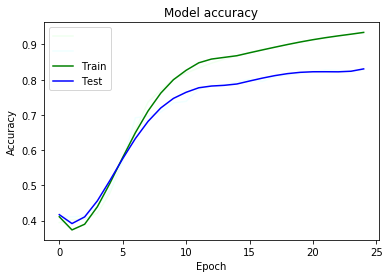

In [212]:
x = list(range(0, 25))
y1 = hist.history['accuracy'] 
y2 = hist.history['val_accuracy'] 
yhat1 = savgol_filter(y1, 21, 5) # window size 51, polynomial order 3
yhat2 = savgol_filter(y2, 21, 5) # window size 51, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['', '', 'Train', 'Test'], loc='best')
plt.show()

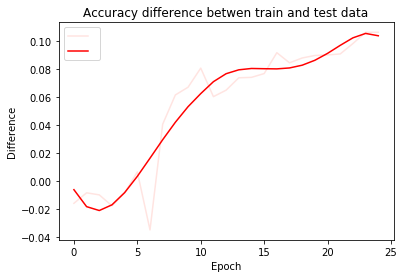

In [213]:
X = hist.history['accuracy']
Y = hist.history['val_accuracy'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 25))
y = x_y
yhat = savgol_filter(y, 21, 5) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Accuracy difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

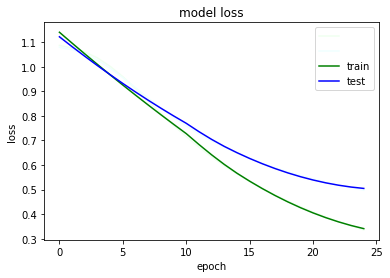

In [214]:
x = list(range(0, 25))
y1 = hist.history['loss'] 
y2 = hist.history['val_loss'] 
yhat1 = savgol_filter(y1, 21, 2) # window size 501, polynomial order 3
yhat2 = savgol_filter(y2, 21, 2) # window size 501, polynomial order 3
plt.plot(x,y1, color='honeydew')
plt.plot(x,y2, color='azure')
plt.plot(x,yhat1, color='green')
plt.plot(x,yhat2, color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

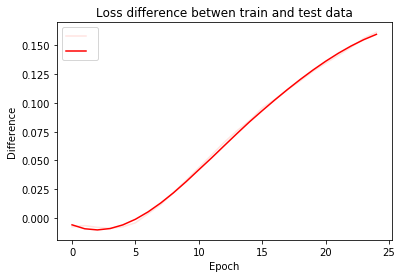

In [217]:
X = hist.history['val_loss']
Y = hist.history['loss'] 
x_y = [x - y for x, y in zip(X, Y)]

x = list(range(0, 25))
y = x_y
yhat = savgol_filter(y, 21, 3) # window size 51, polynomial order 3
plt.plot(x,y, color='mistyrose')
plt.plot(x,yhat, color='red')
plt.title('Loss difference betwen train and test data')
plt.ylabel('Difference')
plt.xlabel('Epoch')
plt.legend(['', '', 'train', 'test'], loc='best')
plt.show()

<ul>
<h3>Predictions</h3>
</ul>

In [218]:
predictions = model.predict(X_trainset)
rounded = [round(x[0]) for x in predictions]

In [219]:
predictions = model.predict(X_trainset)

In [ ]:
for i in range(10):
    print('%d (expected %d)' % (predictions[i], Y[i]))

<ul>
<h3>Plot the ANN</h3>
</ul>

In [ ]:
ann_viz(model, title="Auhtor_Prediction")